# Benchmark de Modelos de Classificação — Dataset Iris

Este notebook inaugura o projeto de benchmarking de algoritmos clássicos de aprendizado de máquina supervisionado. O objetivo é comparar o desempenho de diferentes modelos em tarefas de classificação e regressão, utilizando datasets consagrados da literatura.

Neste primeiro experimento, utilizamos o **dataset Iris**, um dos mais conhecidos em ciência de dados. Ele contém 150 amostras de flores de três espécies de íris (Setosa, Versicolor e Virginica), com quatro atributos numéricos: comprimento e largura de pétala e sépala.

A proposta é:

- Avaliar o desempenho de algoritmos clássicos de classificação (Logistic Regression, Decision Tree, Random Forest, SVM, KNN, Naive Bayes e MLP)
- Utilizar tanto a abordagem de validação hold-out quanto validação cruzada (k-fold)
- Comparar acurácia média e estabilidade (desvio padrão) entre os modelos
- Refletir sobre os resultados obtidos e a capacidade de generalização dos algoritmos

Este estudo serve como base para os próximos benchmarks, permitindo observar como os modelos se comportam em um cenário simples e bem separado — ideal para validar o pipeline e entender os limites da acurácia perfeita.



# 🔹 1. Instalação de bibliotecas

In [ ]:
!pip install shap lime plotly streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d3375d4d3e5a4b51ec3448459fb3db9a960b88a9c658479070afde2987639a1e
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


# 🔹 2. Imports iniciais

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# 🔹 3. Carregamento de dataset (exemplo com Iris)

In [ ]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
df = data.frame
df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 🔹 4. Pré-processamento

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 5. Definição dos modelos

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=1000)
}

# 🔹 6. Treinamento e avaliação

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0      

# 🔹 7. Visualização dos resultados

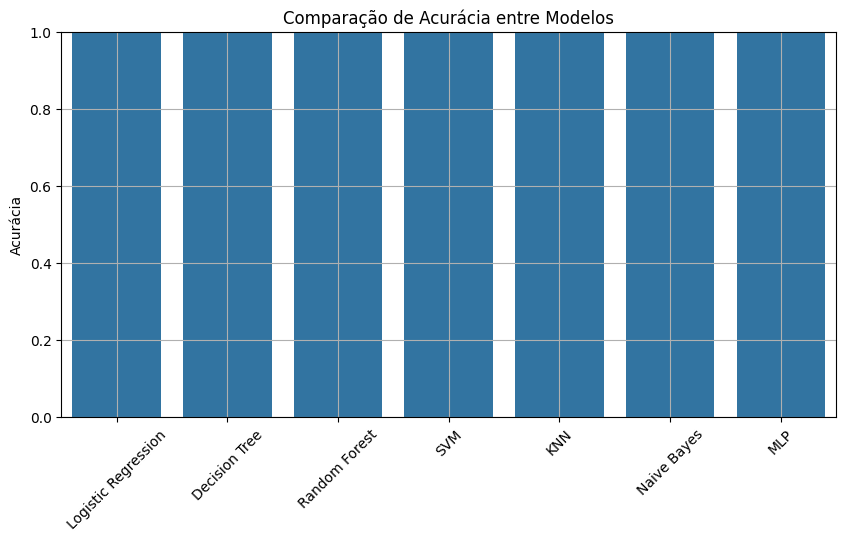

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# 🧪 Investigação

## Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Shape

In [ ]:
print(X_train.shape, X_test.shape)


(120, 4) (30, 4)


## Aplicação de Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: Média = {scores.mean():.3f}, Desvio = {scores.std():.3f}")


Logistic Regression: Média = 0.960, Desvio = 0.039
Decision Tree: Média = 0.960, Desvio = 0.033
Random Forest: Média = 0.953, Desvio = 0.034
SVM: Média = 0.967, Desvio = 0.021
KNN: Média = 0.960, Desvio = 0.025
Naive Bayes: Média = 0.953, Desvio = 0.027
MLP: Média = 0.973, Desvio = 0.033


## Visualização de resultados

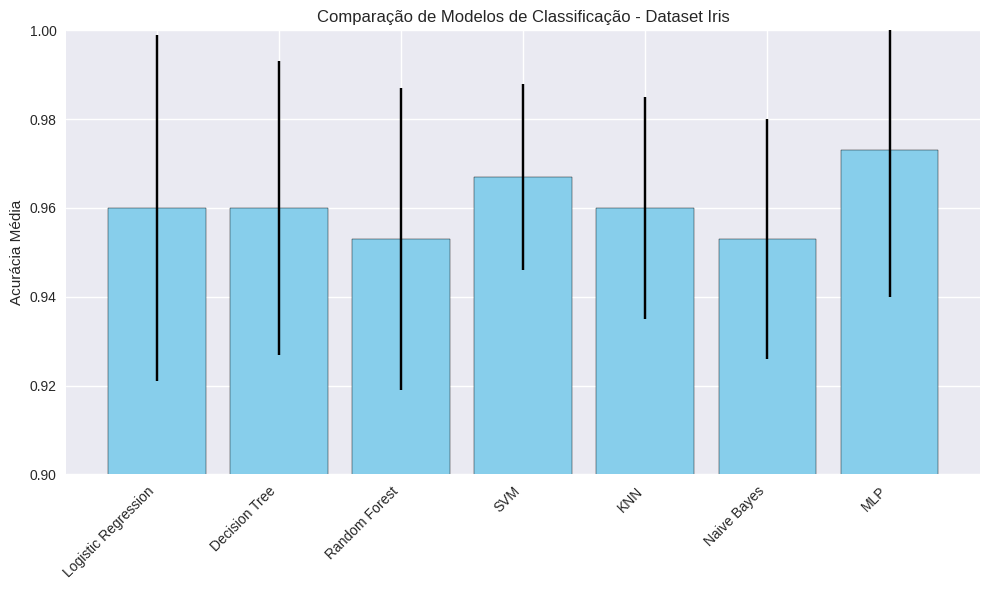

In [ ]:
# Gerando gráfico de barras com média de acurácia e desvio padrão para modelos de classificação no dataset Iris
import matplotlib.pyplot as plt
import numpy as np

# Dados
modelos = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'MLP']
medias = [0.960, 0.960, 0.953, 0.967, 0.960, 0.953, 0.973]
desvios = [0.039, 0.033, 0.034, 0.021, 0.025, 0.027, 0.033]

# Estilo
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras com erro
x = np.arange(len(modelos))
ax.bar(x, medias, yerr=desvios, capsize=5, color='skyblue', edgecolor='black')

# Rótulos e título
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=45, ha='right')
ax.set_ylabel('Acurácia Média')
ax.set_title('Comparação de Modelos de Classificação - Dataset Iris')
ax.set_ylim(0.90, 1.00)

# Layout
plt.tight_layout()
plt.show()


## 📌 Reflexão: Acurácia perfeita no hold-out vs. validação cruzada

Durante os testes com o dataset Iris, todos os modelos apresentaram acurácia de 1.0 no conjunto de teste (hold-out). Embora isso possa parecer ideal, é importante interpretar com cautela:

- **Hold-out é uma amostra única**: A divisão 80/20 pode ter gerado um conjunto de teste fácil de prever. Isso não garante que o modelo generalize bem em outros cenários.
- **Validação cruzada revela variabilidade**: Ao aplicar `cross_val_score`, observamos médias entre 0.953 e 0.973, com desvios entre 0.021 e 0.039. Isso mostra que os modelos são bons, mas não infalíveis.
- **Dataset Iris é bem comportado**: As classes são bem separadas e balanceadas, o que facilita a tarefa de classificação para algoritmos supervisionados.
- **Modelos simples funcionam bem aqui**: Até algoritmos como Naive Bayes e KNN tiveram desempenho excelente, o que não necessariamente se repete em datasets mais complexos.
- **Validação cruzada é mais confiável para benchmarking**: Ela oferece uma visão mais robusta da performance, reduzindo o risco de conclusões precipitadas.

**Conclusão**: A acurácia perfeita no hold-out é um sinal para investigar, não para comemorar. A validação cruzada nos ensina a confiar menos em uma única divisão e mais na consistência do modelo.

